### Clustering Text and Cluster Validation (K-Means)

In [12]:
import numpy as np
import pandas as pa
import seaborn as sn
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
### Clusturing the text 
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [13]:
filedir = os.path.abspath(r"C:\Users\BABI\Dynamic Blog Recommendation\Cleaned Data")
medium_filename = "cleaned_medium"
ana_filename = "cleaned_analytics"
toward_filename = "cleaned_towards_data_science"

toward_filepath = os.path.join(filedir,toward_filename)
medium_filepath = os.path.join(filedir,medium_filename)
ana_filepath = os.path.join(filedir,ana_filename)

data_medium = pa.read_csv(medium_filepath)
data_toward = pa.read_csv(toward_filepath)
data_ana = pa.read_csv(ana_filepath)
data = pa.concat([data_medium,data_toward])
data = pa.concat([data,data_ana])
data.reset_index(drop=True,inplace=True)

In [14]:
### Tfidfvector
tfidf = TfidfVectorizer(analyzer='word',max_features=20000,strip_accents='unicode')
tfidf_data = tfidf.fit_transform(data['Description'])

In [15]:
### define the cluster
n_components = 10
n_cluster = 8

svd = TruncatedSVD(n_components=n_components,random_state=42)
svd_tfidf = svd.fit_transform(tfidf_data)

#kmeans
kmeans = KMeans(n_clusters=n_cluster,random_state=42)
model_clustered = kmeans.fit_predict(svd_tfidf)

In [16]:
clusterd_data_svd = pa.DataFrame(svd_tfidf)
clusterd_data_svd['Cluster'] = model_clustered

cluster1=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 0]
cluster2=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 1]
cluster3=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 2]
cluster4=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 3]
cluster5=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 4]
cluster6=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 5]
cluster7=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 6]
cluster8=clusterd_data_svd.loc[clusterd_data_svd['Cluster'] == 7]

In [17]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red')
)
scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    marker = dict( size=2, color='yellow')
)
scatter5 = dict(
    mode = "markers",
    name = "Cluster 5",
    type = "scatter3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2],
    marker = dict( size=2, color='orange')
)
scatter6 = dict(
    mode = "markers",
    name = "Cluster 6",
    type = "scatter3d",    
    x = cluster6.as_matrix()[:,0], y = cluster6.as_matrix()[:,1], z = cluster6.as_matrix()[:,2],
    marker = dict( size=2, color='dimgrey')
)
scatter7 = dict(
    mode = "markers",
    name = "Cluster 7",
    type = "scatter3d",    
    x = cluster7.as_matrix()[:,0], y = cluster7.as_matrix()[:,1], z = cluster7.as_matrix()[:,2],
    marker = dict( size=2, color='firebrick')
)
scatter8 = dict(
    mode = "markers",
    name = "Cluster 9",
    type = "scatter3d",    
    x = cluster8.as_matrix()[:,0], y = cluster8.as_matrix()[:,1], z = cluster8.as_matrix()[:,2],
    marker = dict( size=2, color='orchid')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    color='yellow', showscale = True
)
cluster5 = dict(
    alphahull = 5,
    name = "Cluster 5",
    opacity = .1,
    type = "mesh3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2],
    color='orange', showscale = True
)
cluster6 = dict(
    alphahull = 5,
    name = "Cluster 6",
    opacity = .1,
    type = "mesh3d",    
    x = cluster6.as_matrix()[:,0], y = cluster6.as_matrix()[:,1], z = cluster6.as_matrix()[:,2],
    color='dimgrey', showscale = True
)
cluster7 = dict(
    alphahull = 5,
    name = "Cluster 7",
    opacity = .1,
    type = "mesh3d",    
    x = cluster7.as_matrix()[:,0], y = cluster7.as_matrix()[:,1], z = cluster7.as_matrix()[:,2],
    color='firebrick', showscale = True
)
cluster8 = dict(
    alphahull = 5,
    name = "Cluster 8",
    opacity = .1,
    type = "mesh3d",    
    x = cluster8.as_matrix()[:,0], y = cluster8.as_matrix()[:,1], z = cluster8.as_matrix()[:,2],
    color='olive', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3,scatter4,scatter5,scatter6, scatter7,
                  scatter8, cluster1, cluster2, cluster3,cluster4,cluster5,cluster6, cluster7, cluster8], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

In [18]:
### Cluster Validation and varitey of words in a cluster
data['Cluster'] = clusterd_data_svd['Cluster']

In [19]:
def cluster_validation(data,cluster):
    data_t = data['Cluster'].map(lambda x: 1 if x == cluster else 0)
    data_train = data['Description']
    y_train = data_t
    
    data_tfidf = TfidfVectorizer(analyzer='word',max_features=20000,strip_accents='unicode').fit_transform(data_train)
    X_train,X_test,Y_train,Y_test = train_test_split(data_tfidf,y_train,test_size=0.3,random_state=40)
    
    #Hyper parameter optimaiztion of random forest using grid search cv
    tuned_parameters = [{'max_depth':[15,20,50,100],
                         'n_estimators':[10,20,30,50,100]}]
    model =RandomForestClassifier()
    model_grid = GridSearchCV(model,tuned_parameters,cv=5,scoring='roc_auc')
    best_model = model_grid.fit(X_train,Y_train)
    
    
    ##Train the best models
    random_model = RandomForestClassifier(**(best_model.best_params_))
    random_model =random_model.fit(X_train,Y_train)
    score = random_model.score(X_test,Y_test)
    
    ##Get the top words
    feature_imp = random_model.feature_importances_
    features =tfidf.get_feature_names()
    
    feature_rank = pa.DataFrame({'words':features,'scores':feature_imp}) 
    feature_rank = feature_rank.sort_values(['scores','words'],ascending=[0, 1])
    feature_rank = feature_rank[0:30]
    d= feature_rank.set_index('words')['scores'].to_dict()
    ### Return top words
    return best_model.best_score_,random_model,d

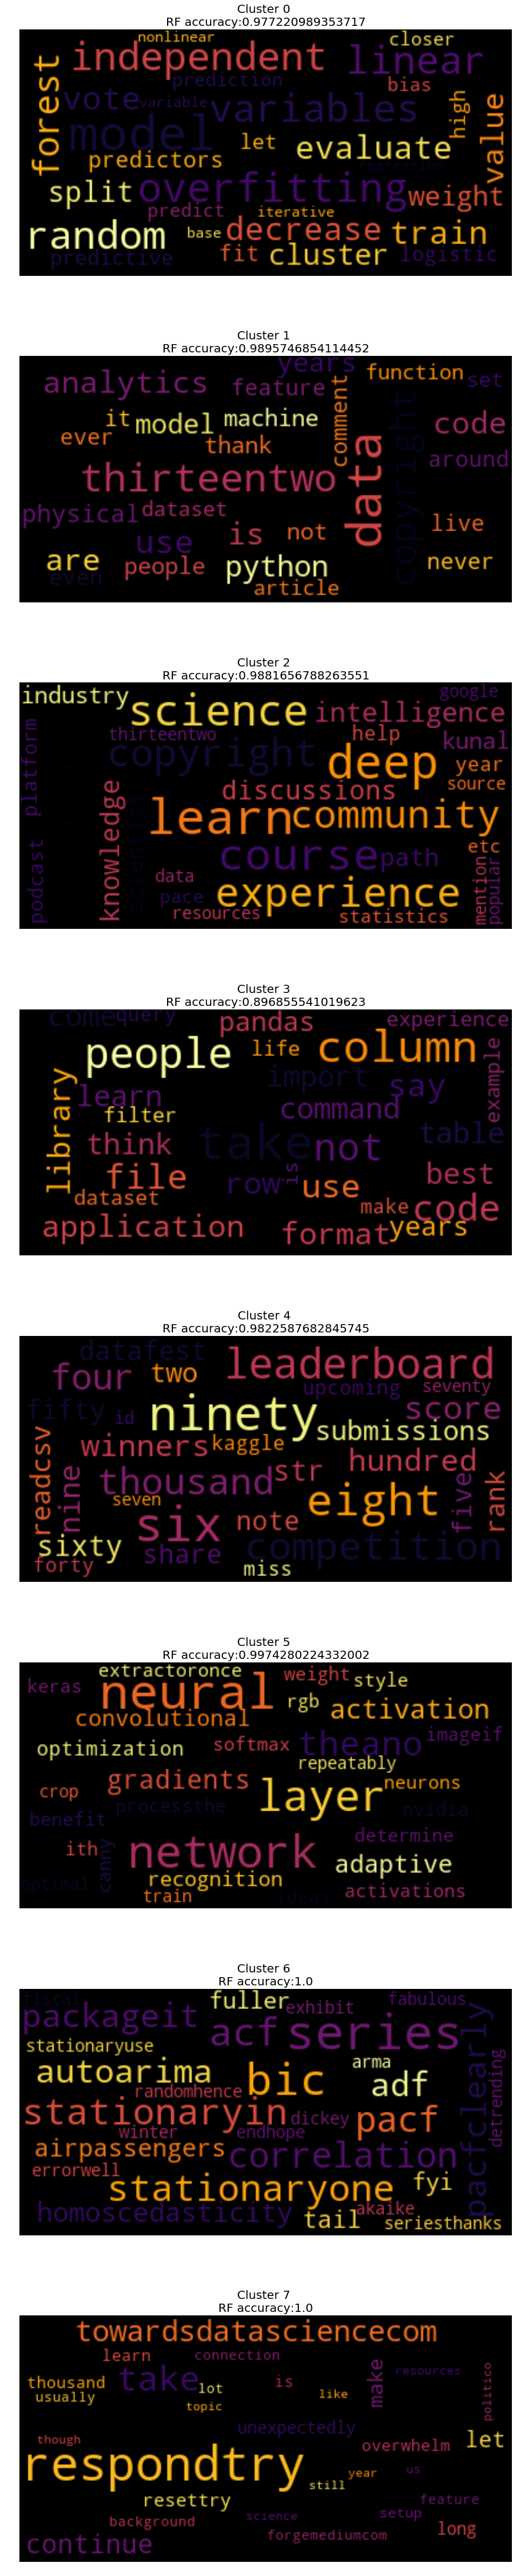

In [20]:
fig, ax = plt.subplots(n_cluster, sharex=True, figsize=(15,10*n_cluster))

for i in range(0,n_cluster):
    score,model,d = cluster_validation(data,i)
    wordcloud = WordCloud(max_font_size=40,collocations=False,colormap=matplotlib.cm.inferno,background_color='black').fit_words(d)
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].set_title('Cluster {} \nRF accuracy:{}'.format(i, score), fontsize = 20)
    ax[i].axis("off")

In [21]:
## Kmeans clusturing is doing quite good at distingusing diffrent clusters (it's making sense!!!)